In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from tabulate import tabulate
#try other encoding?
df = pd.read_csv("data.csv", encoding = "ISO-8859-1", sep=";")

goals=list(round(df['Goals']*df['90s']))
shots=list(df['Shots']*df['90s'])
players=list(df['Player'])


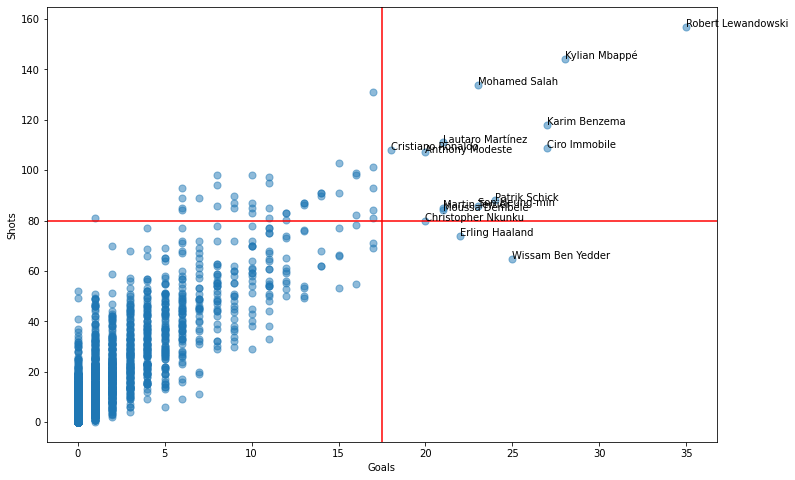

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(goals,shots,s=50,alpha=0.5)
plt.axhline(y=80, color='red')
plt.axvline(x=17.5, color='red')
plt.xlabel("Goals")
plt.ylabel("Shots")
for i in range(len(players)):
    if(goals[i]> 17 and shots[i]> 60):
        plt.annotate(players[i],(goals[i], shots[i]), ha='left')

In [36]:
new = df[['Player', 'Pos', 'Squad', 'Comp']].copy()

In [37]:
new['Goals'] = round(df['Goals'] * df['90s'])

In [38]:
new.sort_values('Goals', ascending=False)

,Player,Pos,Squad,Comp,Goals
1512,Robert Lewandowski,FW,Bayern Munich,Bundesliga,35.0
1720,Kylian Mbappé,FW,Paris S-G,Ligue 1,28.0
284,Karim Benzema,FW,Real Madrid,La Liga,27.0
1236,Ciro Immobile,FW,Lazio,Serie A,27.0
265,Wissam Ben Yedder,FW,Monaco,Ligue 1,25.0
...,...,...,...,...,...
1619,Nikola Maksimovi?,DF,Genoa,Serie A,0.0
1617,Béni Makouana,FWMF,Montpellier,Ligue 1,0.0
485,Samu Castillejo,FWMF,Milan,Serie A,0.0
1613,Josh Maja,FW,Bordeaux,Ligue 1,0.0


In [39]:
print(tabulate(new.sort_values('Goals', ascending=False), headers="keys"))

      Player                        Pos    Squad            Comp              Goals
----  ----------------------------  -----  ---------------  --------------  -------
1512  Robert Lewandowski            FW     Bayern Munich    Bundesliga           35
1720  Kylian Mbappé                 FW     Paris S-G        Ligue 1              28
 284  Karim Benzema                 FW     Real Madrid      La Liga              27
1236  Ciro Immobile                 FW     Lazio            Serie A              27
 265  Wissam Ben Yedder             FW     Monaco           Ligue 1              25
2425  Patrik Schick                 FW     Leverkusen       Bundesliga           24
2360  Mohamed Salah                 FW     Liverpool        Premier League       23
1180  Son Heung-min                 FWMF   Tottenham        Premier League       23
1117  Erling Haaland                FW     Dortmund         Bundesliga           22
2633  Martin Terrier                FWMF   Rennes           Ligue 1         

In [40]:
# forward comparison
# stats to be used: Goals, G/Sh, GCA, TouAttPen, DriSucc, AerWon% or AerWon

In [41]:
df_spider = df[['Player', 'Pos', 'Comp', 'Squad', 'AerWon%', 'Min']].copy()
df_spider.head()

,Player,Pos,Comp,Squad,AerWon%,Min
0,Max Aarons,DF,Premier League,Norwich City,22.7,2881
1,Yunis Abdelhamid,DF,Ligue 1,Reims,59.8,2983
2,Salis Abdul Samed,MF,Ligue 1,Clermont Foot,50.0,2462
3,Laurent Abergel,MF,Ligue 1,Lorient,50.0,2956
4,Charles Abi,FW,Ligue 1,Saint-Étienne,100.0,45


In [42]:
df_spider['Goals'] = round(df['Goals'] * df['90s'])
df_spider['DriSucc'] = round(df['DriSucc'] * df['90s'])
df_spider['TouAttPen'] = round(df['TouAttPen'] * df['90s'])
df_spider['GCA'] = round(df['GCA'] * df['90s'])
df_spider['G/Sh%'] = round(df['G/Sh'] * 100)
df_spider

,Player,Pos,Comp,Squad,AerWon%,Min,Goals,DriSucc,TouAttPen,GCA,G/Sh%
0,Max Aarons,DF,Premier League,Norwich City,22.7,2881,0.0,33.0,29.0,5.0,0.0
1,Yunis Abdelhamid,DF,Ligue 1,Reims,59.8,2983,2.0,16.0,28.0,1.0,11.0
2,Salis Abdul Samed,MF,Ligue 1,Clermont Foot,50.0,2462,1.0,27.0,17.0,1.0,6.0
3,Laurent Abergel,MF,Ligue 1,Lorient,50.0,2956,0.0,42.0,15.0,5.0,0.0
4,Charles Abi,FW,Ligue 1,Saint-Étienne,100.0,45,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2916,Martín Zubimendi,MF,La Liga,Real Sociedad,65.0,2591,2.0,10.0,31.0,1.0,10.0
2917,Szymon ?urkowski,MF,Serie A,Empoli,39.4,2307,6.0,28.0,61.0,4.0,13.0
2918,Martin Ødegaard,MF,Premier League,Arsenal,40.5,2785,7.0,22.0,72.0,12.0,13.0
2919,Milan ?uri?,FW,Serie A,Salernitana,72.0,2165,5.0,11.0,156.0,8.0,8.0


In [46]:

categories = ['Goals', 'Successful Dribbles', 'Touches in Attacking Penalty Area', 'Goal-Creating Actions', 'Aerials Won in %', 'Goals per Shot in %']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3, 6],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2, 6],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 6]
    )),
  showlegend=False
)

fig.show()